# Lab 3: Instacart Market Basket

## Fuente de datos

El dataset proviene de una compentencia de Kaggle (https://www.kaggle.com/c/instacart-market-basket-analysis/data). Los datos contienen información de órdenes realizadas por los usuarios en el tiempo.

## Descripción de archivos (Extraída de Kaggle)

The dataset for this competition is a relational set of files describing customers' orders over time. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders. For more information, see the blog post accompanying its public release.

Each entity (customer, product, order, aisle, etc.) has an associated unique id. Most of the files and variable names should be self-explanatory.
aisles.csv

 aisle_id,aisle  
 1,prepared soups salads  
 2,specialty cheeses  
 3,energy granola bars  
 ...

departments.csv

 department_id,department  
 1,frozen  
 2,other  
 3,bakery  
 ...

order_products__train.csv

These files specify which products were purchased in each order. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items.

 order_id,product_id,add_to_cart_order,reordered  
 1,49302,1,1  
 1,11109,2,1  
 1,10246,3,0  
 ... 

orders.csv

'order_dow' is the day of week.

 order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order  
 2539329,1,prior,1,2,08,  
 2398795,1,prior,2,3,07,15.0  
 473747,1,prior,3,3,12,21.0  
 ...

products.csv

 product_id,product_name,aisle_id,department_id
 
 1,Chocolate Sandwich Cookies,61,19  
 2,All-Seasons Salt,104,13  
 3,Robust Golden Unsweetened Oolong Tea,94,7  
 ...


In [50]:
#### Cargar librerías a usar
import numpy as np # Numpy es una librería de programación numérica super rápida
import scipy as sp # Scipy tiene funcionos estadísticas
import matplotlib as mpl # Importa matplotlib, librería para graficar
import matplotlib.cm as cm # nos permite rápido acceso a colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd # Nos permite manejar data como dataframes
import seaborn as sns # Define estilos y nos da más opciones para plotting

In [51]:
#### Carga de datos
aisles = pd.read_csv('aisles.csv')
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [52]:
depart = pd.read_csv('departments.csv')
depart

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [53]:
products = pd.read_csv('products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [54]:
opt = pd.read_csv('order_products__train.csv')
opt

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [55]:
orders = pd.read_csv('orders.csv')
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [56]:
#### Muestra la cantidad de órdenes realizadas por día de semana (order_dow) y gráficalo usando dataframe.plot(kind='bar')

cyw = ['order_number', 'order_dow']
#orders[cyw]
group_orderdow = orders[cyw].groupby( by= ['order_dow']).count()
group_orderdow

,order_number
order_dow,
0,600905
1,587478
2,467260
3,436972
4,426339
5,453368
6,448761


<Figure size 432x288 with 0 Axes>

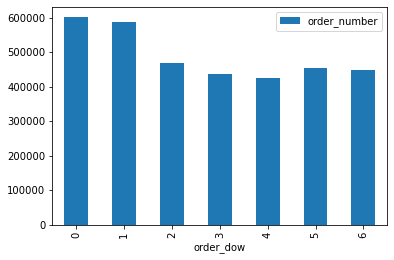

In [57]:
plt.figure();
group_orderdow.plot(kind='bar');

In [58]:
#### Muestra la cantidad de órdenes realizadas por hora del día (order_hour_of_day) y gráficalo usando dataframe.plot(kind='bar')
cyw1 = ['order_number', 'order_hour_of_day']
#orders[cyw]
group_orderhod = orders[cyw1].groupby( by= ['order_hour_of_day']).count()
group_orderhod


,order_number
order_hour_of_day,
0,22758
1,12398
2,7539
3,5474
4,5527
5,9569
6,30529
7,91868
8,178201


<Figure size 432x288 with 0 Axes>

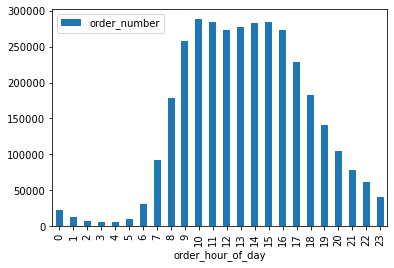

In [59]:
plt.figure();
group_orderhod.plot(kind='bar');

In [60]:
opt

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [61]:
#### ¿Cuántos productos compra en promedio un usuario en una orden?
cyw2 = ['order_id', 'product_id']
#orders[cyw]
order_product = opt[cyw2].groupby( by= ['order_id']).count()
order_product

,product_id
order_id,
1,8
36,8
38,9
96,7
98,49
...,...
3421049,6
3421056,5
3421058,8


In [62]:
product_mean = order_product.mean()['product_id']
product_mean

10.552759338155157

In [63]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [64]:
depart

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [65]:
#### ¿Cuál es el departamento que más está presente en las órdenes?
opt_prod = pd.merge(opt, products, on='product_id')
opt_prod
cyw3 = ['order_id', 'department_id' ]
#orders[cyw]
dep_orders = opt_prod[cyw3].groupby( by= ['department_id']).count()
dep_orders


,order_id
department_id,
1,100426
2,1795
3,48394
4,409087
5,5598
6,11902
7,114046
8,4497
9,38713


In [66]:
#### ¿Cuál es el departamento que más está presente en las órdenes?
opt_prod1 = pd.merge(dep_orders, depart, on='department_id')
opt_prod1
top_dept = opt_prod1.sort_values(by=['order_id'],ascending=False).head(5)
top_dept

,department_id,order_id,department
3,4,409087,produce
15,16,217051,dairy eggs
18,19,118862,snacks
6,7,114046,beverages
0,1,100426,frozen


In [69]:
### ¿Cuáles son los mejores productos en venta?
cyw4 = ['order_id', 'product_id']
#orders[cyw]
best_product = opt[cyw2].groupby( by= ['product_id']).count()
best_product
top_products = best_product.sort_values(by=['order_id'],ascending=False).head(5)
top_products

,order_id
product_id,
24852,18726
13176,15480
21137,10894
21903,9784
47626,8135


In [99]:
p_name= pd.merge(top_products, products, on= 'product_id')
p_name
cyw5 = ['Times_ordered', 'product_id', 'product_name']
p_name
rename = p_name.rename(columns={'order_id':'Times_ordered'})
rename[cyw5]

,Times_ordered,product_id,product_name
0,18726,24852,Banana
1,15480,13176,Bag of Organic Bananas
2,10894,21137,Organic Strawberries
3,9784,21903,Organic Baby Spinach
4,8135,47626,Large Lemon


In [102]:
#### ¿Cuáles son los productos más frecuentes reordenados?
cyw6 = ['reordered', 'product_id']
#orders[cyw]
reor_product = opt[cyw6].groupby( by= ['product_id']).count()
reor_product
reor_products = reor_product.sort_values(by=['reordered'],ascending=False).head(5)
reor_products

,reordered
product_id,
24852,18726
13176,15480
21137,10894
21903,9784
47626,8135


In [108]:
p_name1 = pd.merge(reor_products, products, on= 'product_id')
p_name1
rename1 = p_name1.rename(columns={'reordered':'Times_reordered'})
rename1
cyw7 = ['Times_reordered', 'product_id', 'product_name']
rename1[cyw7]

,Times_reordered,product_id,product_name
0,18726,24852,Banana
1,15480,13176,Bag of Organic Bananas
2,10894,21137,Organic Strawberries
3,9784,21903,Organic Baby Spinach
4,8135,47626,Large Lemon
